### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Pre-processing

In the Data Preprocessing section, you will learn data preprocessing techniques with scikit-learn, one of the most popular frameworks used for industry data science. The data has to be transformed or organized into a proper format before training them.

The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement `import sklearn`.

### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib as plt
import seaborn as sns

### Importing data

We can refer to the Pandas module using the "dot notation" to call its methods. To read our data (which is in the form of csv files), into a so-called DataFrame structure, we use the method read_csv() and pass in each file name as a string: All the datasets are loaded and storeed in pandas dataframe objects.

In [2]:
%%time
info_content_df = pd.read_csv('../data/raw/Info_Content.csv')
info_userdata_df = pd.read_csv('../data/raw/Info_UserData.csv')
log_problem_df = pd.read_csv('../data/raw/Log_Problem.csv')

Wall time: 8.9 s


---

## 1. Data Cleaning

**Drop missing values or fill them in with an automated workflow.**

Machine learning algorithms cannot work with missing features.

---

### 1.1 Handling missing values

The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

In [3]:
# get the number of missing data points per column
missing_values_count = info_content_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

ucid                   0
content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [4]:
# how many total missing values do we have?
total_cells = np.product(info_content_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing )

0.0


In [5]:
# get the number of missing data points per column
missing_values_count = info_userdata_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

uuid                        0
gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(info_userdata_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.564561056287052


In [7]:
# replace all NA's with unspecified
info_userdata_df = info_userdata_df.fillna('unspecified')

In [8]:
# get the number of missing data points per column
missing_values_count = log_problem_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

upid                                     0
timestamp_TW                             0
uuid                                     0
ucid                                     0
problem_number                           0
exercise_problem_repeat_session          0
is_correct                               0
total_sec_taken                          0
total_attempt_cnt                        0
used_hint_cnt                            0
is_hint_used                             0
is_downgrade                       3843919
is_upgrade                         3843919
level                                    0
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product(log_problem_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

12.850578025763944


In [10]:
# replace all NA's with false
log_problem_df = log_problem_df.fillna(False)

---

### 1.2 Parsing Date

**Help Python recognize dates as composed of day, month, and year.**

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

In [11]:
info_userdata_df.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,unspecified,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,unspecified,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,unspecified,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,unspecified,7945,0,2019-01-24,2,km,1,False,0,1,0


In [12]:
info_userdata_df['first_login_date_TW'].head()

0    2019-01-24
1    2019-01-24
2    2019-01-24
3    2019-01-24
4    2019-01-24
Name: first_login_date_TW, dtype: object

In [13]:
log_problem_df['timestamp_TW'].head()

0    2018-09-28 20:00:00 UTC
1    2018-09-28 10:15:00 UTC
2    2018-09-05 20:00:00 UTC
3    2018-09-14 16:30:00 UTC
4    2018-09-13 16:00:00 UTC
Name: timestamp_TW, dtype: object

### Convert our date columns to datetime

We can pandas what the format of our dates are with a guide called as "strftime directive", which you can find more information on at this link. The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [14]:
info_userdata_df['first_login_date_TW'] = pd.to_datetime(info_userdata_df['first_login_date_TW'], format='%Y-%m-%d')
info_userdata_df = info_userdata_df.rename(columns = {'first_login_date_TW':'date_login'})

In [15]:
log_problem_df['timestamp_TW'] = pd.to_datetime(log_problem_df['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
log_problem_df = log_problem_df.rename(columns = {'timestamp_TW':'datetime_attempt'})

In [16]:
log_problem_df['date_attempt'] = pd.to_datetime(log_problem_df['datetime_attempt'].dt.date, format='%Y-%m-%d')

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [17]:
log_problem_df['date_attempt'].dtype

dtype('<M8[ns]')

In [18]:
info_userdata_df['date_login'].dtype

dtype('<M8[ns]')

In [19]:
# print the first few rows
info_userdata_df['date_login'].head()

0   2019-01-24
1   2019-01-24
2   2019-01-24
3   2019-01-24
4   2019-01-24
Name: date_login, dtype: datetime64[ns]

In [20]:
log_problem_df['datetime_attempt'].head()

0   2018-09-28 20:00:00+00:00
1   2018-09-28 10:15:00+00:00
2   2018-09-05 20:00:00+00:00
3   2018-09-14 16:30:00+00:00
4   2018-09-13 16:00:00+00:00
Name: datetime_attempt, dtype: datetime64[ns, UTC]

In [21]:
log_problem_df['date_attempt'].head()

0   2018-09-28
1   2018-09-28
2   2018-09-05
3   2018-09-14
4   2018-09-13
Name: date_attempt, dtype: datetime64[ns]

### Merge

In [22]:
log_problem_info_userdata_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')
log_problem_info_userdata_info_content_df = log_problem_info_userdata_df.merge(info_content_df,how='left',on='ucid')

In [23]:
log_problem_info_userdata_info_content_df.head()

,upid,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,has_class_cnt,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,...,1,【基礎】倍數的應用,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,...,0,【基礎】找出最小公倍數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,...,0,【基礎】尋找質因數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,DoAefIneFglvkxJ4Jb8VyB8JrESm9UEHtGyV4MqiwCo=
3,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,...,0,【基礎】數的相關名詞介紹,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,/yqeM1FRP1rB9WuQWBkStMqrBQgjEexaeyWIhBC7ov4=,Vuo8t3kw/4IH80FuZ0l0uJPwpfrMs8SxhCbJA8zn3vU=
4,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,...,0,【基礎】大數的加減,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,hq6uCe9NmtCc+0wlbGGIsxegP2cqYAdFebGd+v4/o8Q=


In [24]:
log_problem_info_userdata_info_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273203 entries, 0 to 4273202
Data columns (total 35 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   upid                             object             
 1   datetime_attempt                 datetime64[ns, UTC]
 2   uuid                             object             
 3   ucid                             object             
 4   problem_number                   int64              
 5   exercise_problem_repeat_session  int64              
 6   is_correct                       bool               
 7   total_sec_taken                  int64              
 8   total_attempt_cnt                int64              
 9   used_hint_cnt                    int64              
 10  is_hint_used                     bool               
 11  is_downgrade                     bool               
 12  is_upgrade                       bool               
 13  level       

In [25]:
log_problem_info_userdata_info_content_df['date_login']

0         2018-09-05
1         2018-09-07
2         2018-09-05
3         2018-09-14
4         2018-09-11
             ...    
4273198   2018-08-09
4273199   2018-09-11
4273200   2018-09-06
4273201   2018-09-03
4273202   2018-09-05
Name: date_login, Length: 4273203, dtype: datetime64[ns]

In [26]:
log_problem_info_userdata_info_content_df['date_attempt']

0         2018-09-28
1         2018-09-28
2         2018-09-05
3         2018-09-14
4         2018-09-13
             ...    
4273198   2018-09-23
4273199   2018-09-18
4273200   2018-09-17
4273201   2018-09-29
4273202   2018-09-13
Name: date_attempt, Length: 4273203, dtype: datetime64[ns]

In [27]:
log_problem_info_userdata_info_content_df['date_count'] = (log_problem_info_userdata_info_content_df['date_attempt'] - log_problem_info_userdata_info_content_df['date_login']).dt.days

In [48]:
user_first_attempt = log_problem_info_userdata_info_content_df.sort_values('date_count').drop_duplicates('uuid')[['uuid','date_count']]

In [49]:
user_first_attempt

,uuid,date_count
3115412,JusqfdyuRduoKEmZAs0PZhDOGjuSqsQiUvYGF1L1+xw=,-328
1371878,Ohw4cJaDNLkgSxDa01yHFGNNEnViYW5R5WX6bf0EY+Q=,-297
1864364,KDrU9L5cBtRrVqVfsPNVle9lnBRO65LWKNjLQ9/d8m8=,-270
1789345,clOon5FUrNe1OCF3XCZcP1Q3u2WXC1VpugS1a60S0Zg=,-269
629779,GTa5iGKt8UBfDJVQepMA57fybwVUqm1lW3Owio3X6kI=,-254
...,...,...
678293,nNb3j5ROVENVzQnl7m42izZjj6V+97Z3CEwEvNQDYwk=,112
3670422,NTrmUfzBKB1ha9EzCWe8XU04pgZMbKLciGhwd5FCwUA=,114
3051806,08eivYx1h8eiFZmCx4wYPKLNnsZrgYeTYhgBregm3Ms=,115
3381879,JoD4HniCQoGg4hPMSu1g6PAm7bk07hq2aDys9TDU4xQ=,117


In [50]:
user_first_attempt[user_first_attempt.date_count < 0]

,uuid,date_count
3115412,JusqfdyuRduoKEmZAs0PZhDOGjuSqsQiUvYGF1L1+xw=,-328
1371878,Ohw4cJaDNLkgSxDa01yHFGNNEnViYW5R5WX6bf0EY+Q=,-297
1864364,KDrU9L5cBtRrVqVfsPNVle9lnBRO65LWKNjLQ9/d8m8=,-270
1789345,clOon5FUrNe1OCF3XCZcP1Q3u2WXC1VpugS1a60S0Zg=,-269
629779,GTa5iGKt8UBfDJVQepMA57fybwVUqm1lW3Owio3X6kI=,-254
...,...,...
1823539,RTATj7xFjppbtGh3uaVnJ/hXsw2ijB8aFpLl/gDWuqM=,-1
3975827,H/ihozxpLETFl/dI8Dtr1HgNWsj8GXxFGZ6h7/aDmnI=,-1
1749015,nhZfUaB1m0M3c8NSb2lYkcDZunck7T8v2NMgI6ZqsK4=,-1
3552248,BNDttkvFrxHYDBdTPHBV7XS/1YwXgDSKMHR1YKO/k3Q=,-1


In [53]:
user_first_attempt[user_first_attempt.date_count >= 0]

,uuid,date_count
3181417,H3WhWZhw/6RU8rFEiN+sBRJXpYjVGl7npJxoaFJWIXU=,0
3182410,0jSoM69QzVXfrartw0vlYrtVFjwtrNtiUSvES5ADv/A=,0
460988,OcHOxZCDdYNbEuDq6SLqSTdRyfj9S/CYbpaDjI0Y340=,0
2369408,MkUgLDAXKm914OxH+KXVhSwdY6UpwFO21s4GWzQl4i4=,0
1825614,hinvqYdsXQY3wD/W5iqKOFTreZ1q+Er4Qqdmi7r6NIc=,0
...,...,...
678293,nNb3j5ROVENVzQnl7m42izZjj6V+97Z3CEwEvNQDYwk=,112
3670422,NTrmUfzBKB1ha9EzCWe8XU04pgZMbKLciGhwd5FCwUA=,114
3051806,08eivYx1h8eiFZmCx4wYPKLNnsZrgYeTYhgBregm3Ms=,115
3381879,JoD4HniCQoGg4hPMSu1g6PAm7bk07hq2aDys9TDU4xQ=,117


In [54]:
user_first_attempt = user_first_attempt[user_first_attempt.date_count >= 0]

The author used inner join to remove those users who do not do any exercises at all.

In [58]:
info_userdata_df = info_userdata_df.merge(user_first_attempt[['uuid','date_count']],how='inner',on='uuid')

In [59]:
info_userdata_df.shape

(33881, 13)

In [60]:
info_userdata_df['date_count'].describe()

count    33881.000000
mean         4.527346
std         11.573579
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        117.000000
Name: date_count, dtype: float64

### View the distribution plot day of month

In [38]:
hour_of_day_problem = log_problem_df['datetime_attempt'].dt.hour
hour_of_day_problem.head()

3030852    7
3106405    7
18740      7
650573     7
40167      7
Name: datetime_attempt, dtype: int64

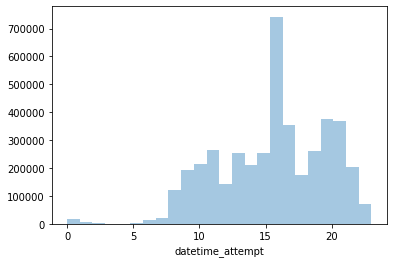

In [39]:
# remove na's
hour_of_day_problem = hour_of_day_problem.dropna()

# plot the day of the month
sns.distplot(hour_of_day_problem, kde=False, bins=24)

In [40]:
log_problem_df['hour_of_day'] = hour_of_day_problem

In [41]:
log_problem_df.head()

,upid,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,date_attempt,hour_of_day
3030852,2Q787l3L0G7f5P0iSWUE4hCfJfYo9uHL4pWV1U45JoQ=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,1,True,10,1,0,False,False,False,0,2018-08-01,7
3106405,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,1,1,True,10,1,0,False,False,False,0,2018-08-01,7
18740,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2,1,True,8,1,0,False,False,False,0,2018-08-01,7
650573,hYmhOfMMKaQNTrGze5TdATN0HNGJUEjDIYQaocuD4QY=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2,1,True,6,1,0,False,False,False,0,2018-08-01,7
40167,VMScsPmyKXsk5k7+abPqyEbDFRSsCE2XZs5lMKHQHEM=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,3,1,True,7,1,0,False,False,False,0,2018-08-01,7


In [42]:
# get the day of the month from the date_parsed column
day_of_month_userdata = info_userdata_df['date_login'].dt.day
day_of_month_userdata.head()

0    1
1    1
2    1
3    1
4    1
Name: date_login, dtype: int64

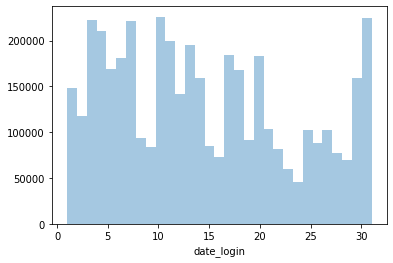

In [43]:
# remove na's
day_of_month_userdata = day_of_month_userdata.dropna()

# plot the day of the month
sns.distplot(day_of_month_userdata, kde=False, bins=31)

In [44]:
info_userdata_df['day_of_month'] = day_of_month_userdata

In [45]:
info_userdata_df.head()

,uuid,gender,points,badges_cnt,date_login,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,date_count,day_of_month
0,wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,unspecified,32769,6,2018-08-01,6,cy,1,False,0,1,0,0,1
1,wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,unspecified,32769,6,2018-08-01,6,cy,1,False,0,1,0,0,1
2,wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,unspecified,32769,6,2018-08-01,6,cy,1,False,0,1,0,0,1
3,wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,unspecified,32769,6,2018-08-01,6,cy,1,False,0,1,0,0,1
4,wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,unspecified,32769,6,2018-08-01,6,cy,1,False,0,1,0,0,1


In [46]:
# get the day of the month from the date_parsed column
day_of_month_problem = log_problem_df['datetime_attempt'].dt.day
day_of_month_problem.head()

3030852    1
3106405    1
18740      1
650573     1
40167      1
Name: datetime_attempt, dtype: int64

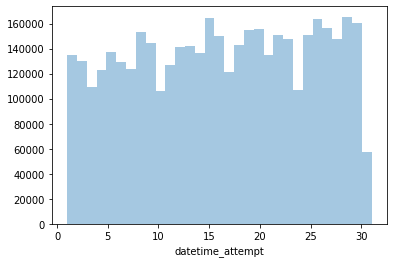

In [47]:
# remove na's
day_of_month_problem = day_of_month_problem.dropna()

# plot the day of the month
sns.distplot(day_of_month_problem, kde=False, bins=31)

In [48]:
log_problem_df['day_of_month'] = day_of_month_problem

In [49]:
log_problem_df.head()

,upid,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,date_attempt,hour_of_day,day_of_month
3030852,2Q787l3L0G7f5P0iSWUE4hCfJfYo9uHL4pWV1U45JoQ=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,1,True,10,1,0,False,False,False,0,2018-08-01,7,1
3106405,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,1,1,True,10,1,0,False,False,False,0,2018-08-01,7,1
18740,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2,1,True,8,1,0,False,False,False,0,2018-08-01,7,1
650573,hYmhOfMMKaQNTrGze5TdATN0HNGJUEjDIYQaocuD4QY=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2,1,True,6,1,0,False,False,False,0,2018-08-01,7,1
40167,VMScsPmyKXsk5k7+abPqyEbDFRSsCE2XZs5lMKHQHEM=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,3,1,True,7,1,0,False,False,False,0,2018-08-01,7,1


The author has parsed the date correctly.

---

### 1.2 Data Integration

**Help Python recognize dates as composed of day, month, and year.**

Merge all the dataframe

In [50]:
log_problem_df.shape

(4273203, 17)

In [51]:
info_userdata_df.shape

(4273203, 14)

In [ ]:
log_problem_df.merge(info_userdata_df,how='left',on='uuid')

In [ ]:
log_problem_info_userdata_info_content_df = log_problem_info_userdata_df.merge(info_content_df,how='left',on='ucid')

In [ ]:
log_problem_info_userdata_info_content_df.head()

In [ ]:
log_problem_info_userdata_info_content_df.shape

In [ ]:
log_problem_info_userdata_info_content_df.columns

In [ ]:
log_problem_info_userdata_info_content_df.info()

In [ ]:
info_userdata_and_info_content_df = log_problem_info_userdata_info_content_df.groupby(by=['uuid','ucid']).agg({'problem_number': 'max',
                                                                           'is_correct': 'count',
                                                                           'total_sec_taken': 'mean',
                                                                           'total_attempt_cnt': 'mean',
                                                                           'used_hint_cnt': 'mean',
                                                                           'level': 'max',
                                                                           'points': 'mean',
                                                                           'badges_cnt': 'mean',
                                                                           'user_grade': 'mean',
                                                                           'has_teacher_cnt': 'mean',
                                                                           'is_self_coach': 'count',
                                                                           'difficulty': 'mean',
                                                                           'learning_stage': 'mean'
                                                                          }).reset_index()

In [ ]:
info_userdata_and_info_content_df.head()

In [ ]:
categorical_columns = log_problem_info_userdata_info_content_df.select_dtypes(exclude=['int64']).columns

In [ ]:
categorical_columns

In [ ]:
#log_problem_info_userdata_info_content_df.groupby(by=['uuid','ucid'])['level2_id', 'level3_id', 'level4_id'].mean()

---

### 1.3 Handling categorical attributes

An error will occur if these categorical varriables are included into most of the machine learning models without preprocessing them first. There are three approach to prepare the categorical data.

- Drop
- Label Encoding
- One-Hot Encoding

In [ ]:
info_content_df.head()

In [ ]:
info_userdata_df.head()

In [ ]:
log_problem_df.head()

## Identifying categorical attributes

In [ ]:
s = info_content_df.dtypes == 'object'
object_cols_info_content = list(s[s].index)

print("Categorical variables: ")
print(object_cols_info_content)

In [ ]:
s = info_userdata_df.dtypes == 'object'
object_cols_info_userdata = list(s[s].index)

print("Categorical variables: ")
print(object_cols_info_userdata)

In [ ]:
s = log_problem_df.dtypes == 'object'
object_cols_log_problem = list(s[s].index)

print("Categorical variables: ")
print(object_cols_log_problem)

### Drop categorical variables

The easiest way to deal with categorical variable is to simply remove the columns from the datasets if the attributes do not contain useful information.

The content_kind and subject attribute only contain one unique value. This would not affect

In [ ]:
selected_columns = ['ucid','difficulty','learning_stage','level2_id','level3_id','level4_id']

In [ ]:
info_content_df = info_content_df[selected_columns].copy()
info_content_df.head()

### Label Encoding

**Mapping ordinal features**

To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Unfortunately, there is no convenient function that can automatically derive the correct order of the labels of our size feature, so we have to define the mapping manually. In the following simple example, let's assume that we know the numerical difference between features, for example, hard = normal + 1 = easy + 2 = unset + 3.

In [ ]:
difficulty_mapping = {
    'easy': 1,
    'normal': 2,
    'hard': 3,
    'unset': 0
}
learning_stage_mapping = {
    'elementary': 1,
    'junior': 2,
    'senior': 3
}

In [ ]:
info_content_df['difficulty'] = info_content_df['difficulty'].map(difficulty_mapping)
info_content_df['learning_stage'] = info_content_df['learning_stage'].map(learning_stage_mapping)

In [ ]:
info_content_df.head()

In [ ]:
info_content_df.describe()

### One-hot encoding - Nominal

By including dummy variable in a regression model however, one should be careful of the Dummy Variable Trap. The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

In [ ]:
is_downgrade_mapping = {
    True: 1,
    False: 0
}
is_upgrade_mapping = {
    True: 1,
    False: 0
}

In [ ]:
log_problem_df['is_downgrade'] = log_problem_df['is_downgrade'].map(is_downgrade_mapping)
log_problem_df['is_upgrade'] = log_problem_df['is_upgrade'].map(is_upgrade_mapping)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
x=pd.DataFrame(OH_encoder.fit_transform(info_content_df[['level2_id','level3_id','level4_id']]))


In [ ]:
info_content_df.head()

In [ ]:
pd.concat([info_content_df, x], axis=1)

In [ ]:
log_problem_df.head()

In [ ]:
info_userdata_gender = pd.get_dummies(info_userdata_df.gender, prefix='gender').iloc[:,:-1]
info_userdata_df = pd.concat([info_userdata_df, info_userdata_gender], axis=1, sort=False)

In [ ]:
info_userdata_city = pd.get_dummies(info_userdata_df.user_city, prefix='user_city').iloc[:,:-1]
info_userdata_df = pd.concat([info_userdata_df, info_userdata_city], axis=1, sort=False)

In [ ]:
info_userdata_df = info_userdata_df.drop(columns = ['gender','user_city'])

The info_userdata dataframe can be glanced through head().

In [ ]:
info_userdata_df.head()

In [ ]:
info_userdata_df.describe()

---

### 1.3 Data Integration

**Help Python recognize dates as composed of day, month, and year.**

Merge all the dataframe

In [ ]:
log_problem_info_userdata_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')
log_problem_info_userdata_info_content_df = log_problem_info_userdata_df.merge(info_content_df,how='left',on='ucid')

In [ ]:
log_problem_info_userdata_info_content_df.head()

In [ ]:
log_problem_info_userdata_info_content_df.shape

In [ ]:
log_problem_info_userdata_info_content_df.columns

In [ ]:
log_problem_info_userdata_info_content_df.info()

In [ ]:
info_userdata_and_info_content_df = log_problem_info_userdata_info_content_df.groupby(by=['uuid','ucid']).agg({'problem_number': 'max',
                                                                           'is_correct': 'count',
                                                                           'total_sec_taken': 'mean',
                                                                           'total_attempt_cnt': 'mean',
                                                                           'used_hint_cnt': 'mean',
                                                                           'level': 'max',
                                                                           'points': 'mean',
                                                                           'badges_cnt': 'mean',
                                                                           'user_grade': 'mean',
                                                                           'has_teacher_cnt': 'mean',
                                                                           'is_self_coach': 'count',
                                                                           'difficulty': 'mean',
                                                                           'learning_stage': 'mean'
                                                                          }).reset_index()

In [ ]:
info_userdata_and_info_content_df.head()

In [ ]:
categorical_columns = log_problem_info_userdata_info_content_df.select_dtypes(exclude=['int64']).columns

In [ ]:
categorical_columns

In [ ]:
#log_problem_info_userdata_info_content_df.groupby(by=['uuid','ucid'])['level2_id', 'level3_id', 'level4_id'].mean()

### Exporting Data

The data is in DataFrame form, it can manipulate it by adding a body mass index column. The transformed data is exported to the interim data folder which stores the intermediate data that has been transformed.

In [ ]:
%%time

info_content_df.to_hdf('../data/interim/Info_Content.h5',key='info_content')
info_userdata_df.to_hdf('../data/interim/Info_UserData.h5',key='info_userdata')
log_problem_df.to_hdf('../data/interim/Log_Problem.h5',key='log_problem')
log_problem_info_userdata_info_content_df.to_hdf('../data/interim/Log_Problem_Info_UserData_Info_Content.h5',key='log_problem')